## Preproccesing Data (Extracting Data)
### Meteorite Data

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)
print(df_meteorite.shape)
df_meteorite.head()

(38116, 7)


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [449]:
# Read Natural Disaster data
# ND = Natural Disaster
df_NDOriginal= pd.read_csv("natural_disaster.csv")
# df_NDOriginal.dropna().head()

In [450]:
# Create new dateframe with only necessary columns
df_ND = pd.DataFrame({'Year':df_NDOriginal['Incident Begin Date'],
                   'Incident Type':df_NDOriginal['Incident Type'], 
                   'Title':df_NDOriginal['Title'],
                   'Declared County':df_NDOriginal['Declared County/Area']})

df_ND['Year'] = (pd.to_datetime(df_ND['Year'])).dt.year
# drop any row with NAN value
df_ND = df_ND.dropna()

print(df_ND.shape)
df_ND.head()

(48193, 4)


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


<hr />

## Observing Data

### Observe number of natural disasters occured per year (1959 ~ 2018)

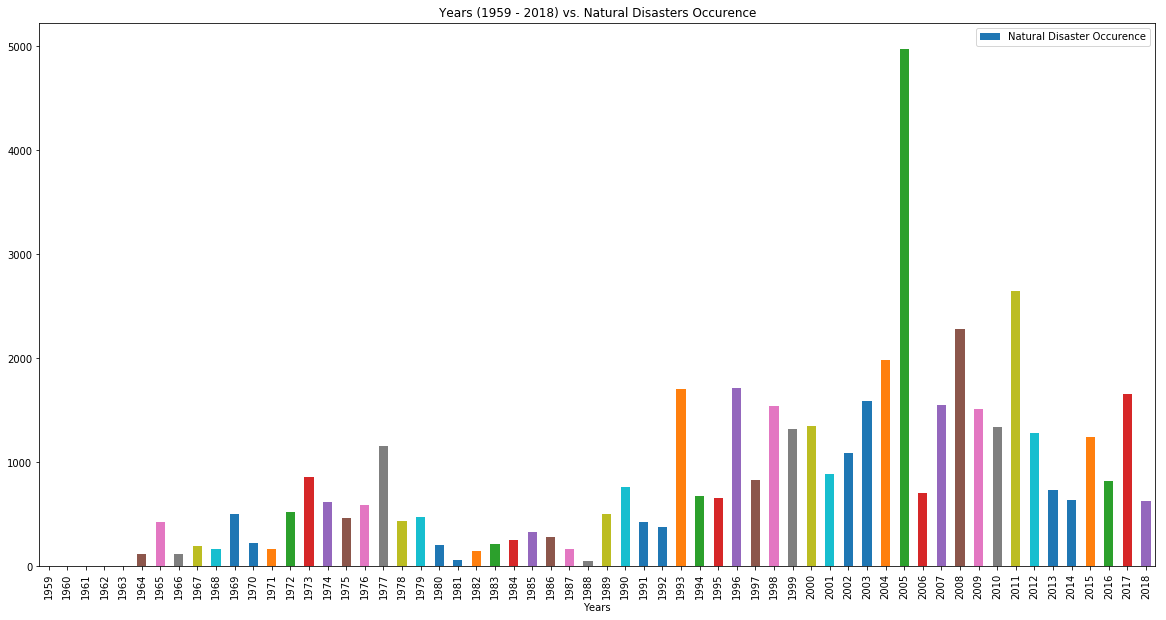

In [493]:
# Sort natural disaster data frame by type of disasters
df_ND = df_ND.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ND['Year'].values

minYear = years[0]
maxYear = years[-1]
years_freq = [0] * (maxYear - minYear + 1)

for x in years:
    years_freq[x-minYear] = years_freq[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

years_xy = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq})
years_xy.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence")

df1 = years_xy.copy()

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured per year (1959 ~ 2018)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

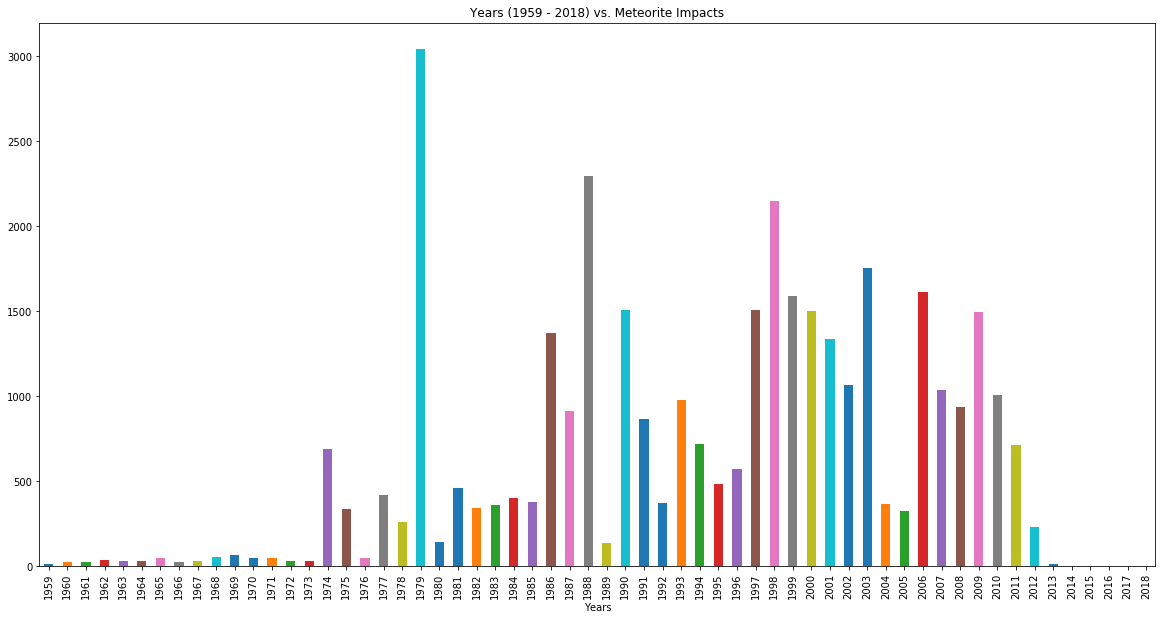

In [494]:
df_meteorite = df_meteorite.sort_values(by=['year'])
df_meteoYear = pd.DataFrame({'Year':df_meteorite['year']})

years_freq = [0] * (maxYear - minYear + 1)

df_meteoYear = df_meteoYear.values

for x in df_meteoYear:
    if int(x) >= minYear and int(x) <= 2018:
        years_freq[int(x)-minYear] = years_freq[int(x)-minYear] + 1

years_xy = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq})
years_xy.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Meteorite Impacts", legend=False)

df2 = years_xy.copy()

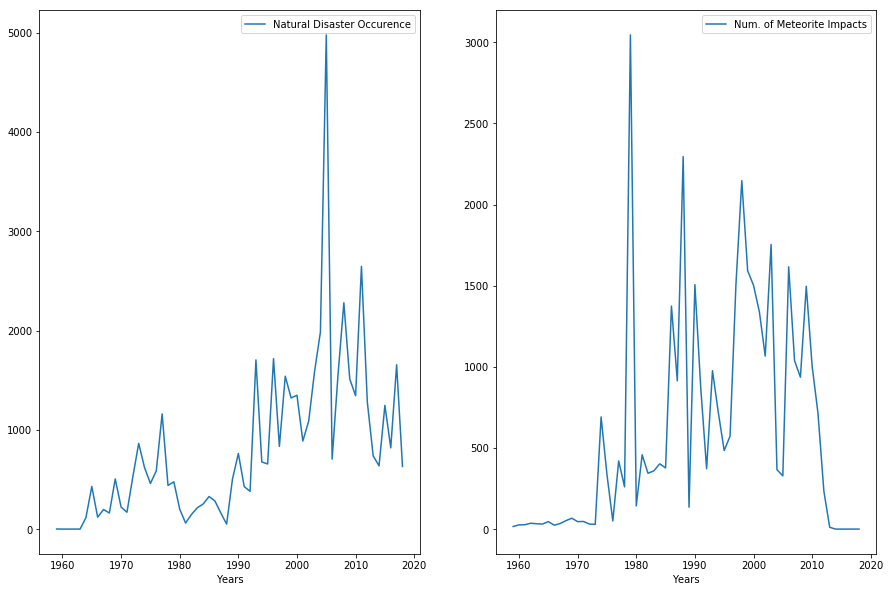

In [487]:
fig, axs = plt.subplots(1,2)

df1.plot(ax=axs[0], x='Years', y='Natural Disaster Occurence', kind='line', figsize=(15, 10))
df2.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 10))

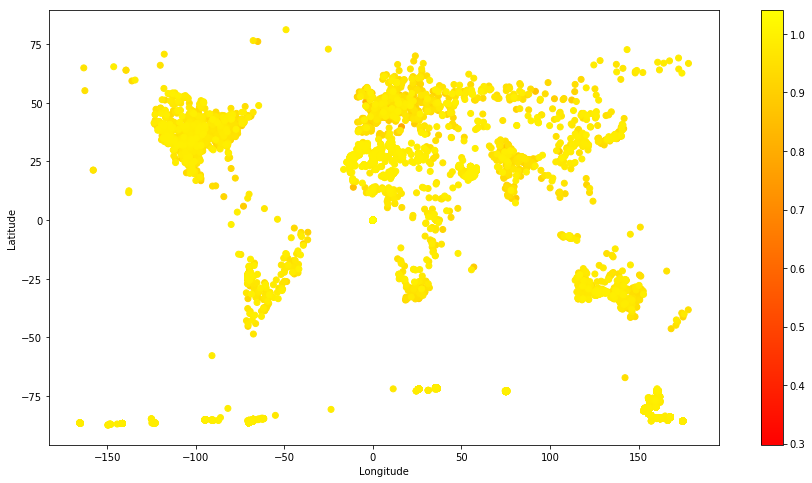

In [454]:
color_yr = [int(year)/2018. for year in df_meteorite['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_meteorite['reclong'], df_meteorite['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()